# Week 2a Questions
1. Decimal values can’t be converted directly to binary. The computer does some rounding to make it be able to convert it to binary and do the calculation. The rounding done is deterministic so the same calculation done will always output the same value but similar calculations can yield slightly different values when compared to each other. This is due to the nature of the rounding. For instance, poly_eval_basic_forward is much larger than poly_eval_basic_reverse in the amount of calculations that need to be made. Due to the larger number of calculations, the errors made add up to deviate the value from the accurate value. This also result in both functions outputting different values. In some cases though rounding error created can still result in a accurate value from a “cancelling of errors” in a sense. These errors should only be worried about when relevant. When looking at the difference of the values obtained by both functions the difference of approximately 2.77*10^-17. In most cases this amount of error is insignificant but in cases when needing larger amounts of accuracy, how accurate the calculations are made might be relevant.


# Calculating the Taylor Series Exansion of sine of x

To calculate the taylor series of sin we used the simplified equation of:

$$
\begin{align}
sin(x) &= \sum_{i=0}^\infty\frac{(-1)^i}{(2i+1)!}x^{2i+1} \\
&= x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...
\end{align}
$$


In [1]:
# Question 2

# This is a program that evualuates Taylor Series Expansion of Sine of x.
import matplotlib.pyplot as plt
import numpy as np
import math

def factorial(count):
    """
    This function takes an integer and calculates and outputs the factorial of the value
    
    """
    result=1
    for x in range(1,count+1):
        result= x*result
    return(result)

def sin_eval_taylor(x_values, ncoeff):
    """
    This is function that evalutes the taylor sin series for a certain value. Function takes the input of the certain x
    value that it will find the taylor sin series for and the number of coefficients used in the taylor sin series and
    outputs the calculated value.
    
    """
    x_values= 1.0*x_values #np.float(x_values)
    count=1
    factor=1
    sign=0
    taylor_sum=0.0
    while count<= ncoeff:
        taylor_sum= taylor_sum+(-1)**sign*(x_values**factor)/factorial(factor)
        factor=factor+2
        count=count+1
        sign=sign+1
    return taylor_sum




## Testing for value of x and array

In [2]:
x_test_array= np.array([1.0,2.0,9.0])

#Testing single value in sin_eval_taylor
print('Finding sin(2):')
print(sin_eval_taylor(2,40))

#Testing array in sin_eval_taylor
print('Finding sin() of array: ')
print(sin_eval_taylor(x_test_array,40))

#Actual Value for sin(2)
print('Actual value of sin():')
print(np.sin(2))

Finding sin(2):
0.9092974268256817
Finding sin() of array: 
[0.8414709848078965 0.9092974268256817 0.41211848524190764]
Actual value of sin():
0.9092974268256817


# Graphing the Taylor Sin Series

The figure provided used:
$$\sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!}(x-0)^k = f(0)+ \frac{f'(0)}{1!}x+\frac{f''(0)}{2!}x^2+...
$$

But since the function uses the equation:
$$
\begin{align}
sin(x) &= \sum_{i=0}^\infty\frac{(-1)^i}{(2i+1)!}x^{2i+1} \\
&= x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...
\end{align}
$$
Therefore theres inconsistancy with the coefficient number. To fix this we can by converting the coefficient using the
equation:

$$
Coeficcient_{graph}=\frac{Coeficcient_{function}+1}{2}
$$


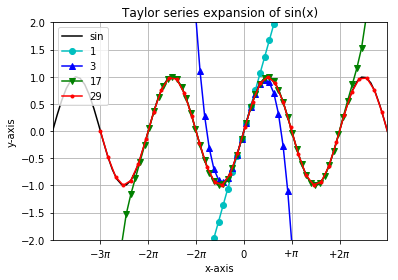

In [3]:
#creating range of the x values 
xvals = np.linspace(-15.0, +15.0, 100)

#creating dictionary to store data for plot
stack = {}

#Adding theoredical values of sin(x)
stack[0]=np.sin(xvals)


for ncoeff in [1,2,9]:
    stack[ncoeff] = sin_eval_taylor(xvals,ncoeff)
   
for n,c,s,l in zip( stack.keys(), ['k','c','b','g'],['','o','^','v'],['sin','1','3','17']):
    plt.plot(xvals, stack[n], c+s+'-', label=l)
    
x_vals_2=np.arange(-3*np.pi,4*np.pi,0.5) 

plt.plot(x_vals_2,sin_eval_taylor(x_vals_2,29) , 'r.-', label='29')
    
plt.ylim(-2,2)

plt.grid('on')
plt.title('Taylor series expansion of sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xticks([-3*np.pi, -2*np.pi,-1*np.pi,0,np.pi,2*np.pi],['$-3\pi$',r'$-2\pi$',r'$-2\pi$',r'$0$',r'$+\pi$',r'$+2\pi$'])
plt.axis([-4*np.pi,3*np.pi,-2,2])
plt.legend(loc=2)

# Absolute Error 

Is defined as the difference between the measured value and the observable value.

$$E=X_i-X_t$$

In [4]:
#calculating the Absolute error
E_3=-np.sin(0.5)+sin_eval_taylor(0.5, 3)
E_9=-np.sin(0.5)+sin_eval_taylor(0.5, 9)
E_29=-np.sin(0.5)+sin_eval_taylor(0.5,29)


#Displaying answers for Absolute error for the different cases
print("The Absolute Error for n=3 is", E_3)
print('The Absolute Error for n=9 is', E_9)
print('The Absolute Error for n=29 is', E_29)

#Calculating Relative Error 
E_r_3=E_3/np.sin(0.5)
E_r_9=E_9/np.sin(0.5)
E_r_29=E_29/np.sin(0.5)

The Absolute Error for n=3 is 1.5447291303316568e-06
The Absolute Error for n=9 is 0.0
The Absolute Error for n=29 is 0.0


# Relative Error
Is the difference between the actual value and the observable value and is normalized by the actual value.

$$E_r=\frac{X_i-X_t}{X_t}$$

In [5]:
#Displaying the answers for Relative error for the differnet cases.

print("The Relative Error for n=3 is ", E_3) 
print("The Relative Error for n=9 is ", E_9) 
print("The Relative Error for n=29 is ", E_29) 

The Relative Error for n=3 is  1.5447291303316568e-06
The Relative Error for n=9 is  0.0
The Relative Error for n=29 is  0.0


# Horner's Method

In this case we will look at where the taylor sin series is:

$$\sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!}(x-0)^k = f(0)+ \frac{f'(0)}{1!}x+\frac{f''(0)}{2!}x^2+...
$$

Then we rearranged to look at the equation and calculate from our largest value to the smallest. For example for three coefficents the taylor sum would be:

$$[(\frac{f'''(0)}{3!}x+\frac{f''(0)}{2!})x+\frac{f'(0)}{1!}]x+f(0)$$

In [9]:
def sin_eval_taylor_reverse(x_values, ncoeff):
    """
    Function which takes a certain x value and number of coefficients and calculates the taylor sin series of
    that value with the desired amount of coeffiecients. Function then outputs the calculated value of the taylor sin 
    series. Calculations use Horner's method.
    """
    
    if ncoeff % 4 == 0:
        factor=0
    elif ncoeff % 4 == 1:
        factor=1
    elif ncoeff % 4 == 2:
        factor=0
    elif ncoeff % 4 == 3:
        factor=-1
    taylor_sum=factor/factorial(ncoeff)
    for values in range(ncoeff-1,-1,-1):
        if ncoeff % 4 == 0:
            factor=0
        elif ncoeff % 4 == 1:
            factor=1
        elif ncoeff % 4 == 2:
            factor=0
        elif ncoeff % 4 == 3:
            factor=-1
        taylor_sum= taylor_sum*x_values+factor/factorial(values)
    return taylor_sum
%timeit sin_eval_taylor_reverse(8, 30)
%timeit sin_eval_taylor(8,30)
print('sin_eval_taylor_reverse(8, 30) is determined to be ',sin_eval_taylor_reverse(8, 30))
print('sin_eval_taylor(8,30) is determined to be ', sin_eval_taylor(8,30))

52 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
115 µs ± 7.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
sin_eval_taylor_reverse(8, 30) is determined to be  0.0
sin_eval_taylor(8,30) is determined to be  0.9893582466234029


## Comparing Reverse Suming to Forward Suming

sin_eval_taylor_reverse took approximately half the time sin_eval_taylor did. But when looking at results of the function. sin_eval_taylor returned a correct value while sin_eval_taylor_reverse did not. Although in theory sin_eval_taylor_reverse is a correct way in finding the value. Just due to the nature of how the calculation takes larger numbers and sums them first and decreases for the following values. The rounding error made could've caused more of a significant effect when compring to forward summing. This shows how sometimes the fastest solution is not the most desirable one.